# U.S. Medical Insurance Costs

## Dataset Overview:
* 7 columns- age:INT, sex:STR, bmi:FLOAT, children:INT, smoker:STR, region:STR, charges:FLOAT
    * Age- Range of discrete integers
    * Sex- Categorical binary between male and female
    * BMI- Continuous float values with varying precision with some integers
    * Children- Discrete integers that start at 0
    * Smoker- Categorical binary between yes and no
    * Region- Categorical set of 4 possible values
    * Charges- Continuous float values with varying precision with some integers
* 1 header row, 1338 records

## Data Formatting and Cleaning:
* Convert sex and smoker values to binaries (if needed)
* Code regions into integers (if needed)
* Make sure bmi and charges are all floats, not integers (if needed)

## Data Analysis Plan:
Relationships between insurance variables to charges model: 
***
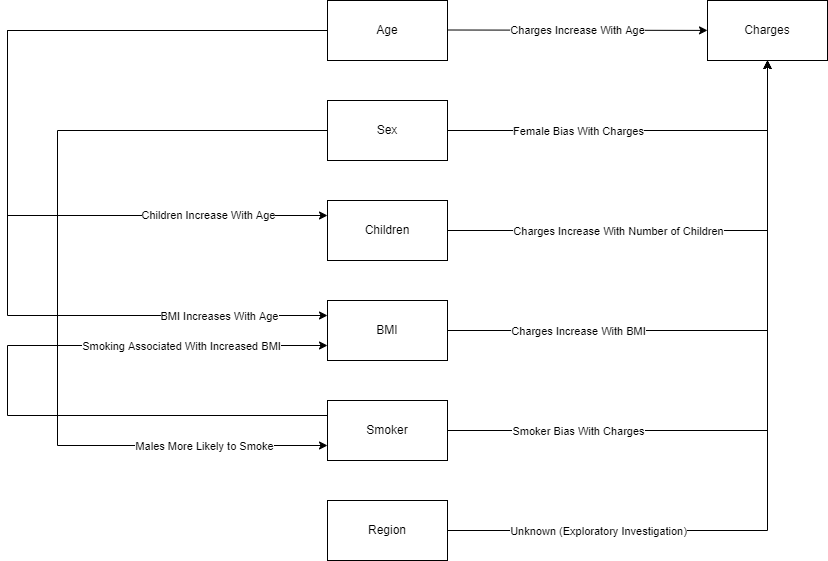
***
Hypothetical relationships and rationale based on personal expectations

Analysis Procedure:
* Use classes to define and manipulate categorical data
* Use functions to analyze numeric data against categorical and other numeric data

In [1]:
# Imports insurance data from CSV

import csv

with open('insurance.csv') as insurance_csv:
    insurance_data = insurance_csv.read()
# print(insurance_data)
print(type(insurance_data))

<class 'str'>


## Import Inspection:
CSVs import as strings
***
**Task:** Format CSV columns into variables that contain lists of their values

In [2]:
# Creates lists of variables from CSV data

split_insurance_data = insurance_data.split('\n')

listed_insurance_records = []
for record in split_insurance_data:
    listed_insurance_records.append(record.split(','))
listed_insurance_records.pop(0) # Removes header row
listed_insurance_records.pop() # Removes empty string/list (Caused by extra line at the end of the CSV?)

# Parces dataset by columns
age = [int(record[0]) for record in listed_insurance_records]
sex = [record[1] for record in listed_insurance_records]
bmi = [float(record[2]) for record in listed_insurance_records]
children = [int(record[3]) for record in listed_insurance_records]
smoker = [record[4] for record in listed_insurance_records]
region = [record[5] for record in listed_insurance_records]
charges = [float(record[6]) for record in listed_insurance_records]

# print(charges)

## Group Tasks:
* Get descriptive statistics for parsed variables.
* Organize and define data for children and region.
* Use predominately class methods to carry out analysis and functions when appropriate.

In [35]:
from matplotlib import pyplot as plt
import numpy as np

# Class for preliminary analysis via methods

class Meddata:
    
    # Method variables for coded values
    age_demographics = ['18-27', '28-37', '38-47', '48-57', '58-67', '68-77', '78-88']
    sexes = ['Male', 'Female']
    bmi_categories = ['Underweight', 'Normalweight', 'Overweight', 'Obese']
    num_children = ['0 Children', '1 Child', '2 Children', '3 Children']
    smoker_status = ['Yes', 'No']
    regions = ['Northeast', 'Northwest', 'Southeast', 'Southwest']
    
    
    # Initialization that takes all of the parsed lists and puts them in the class instance
    def __init__(self, age, sex, bmi, children, smoker, region, charges):
        
        self.age = age
        self.sex = sex
        self.bmi = bmi
        self.children = children
        self.smoker = smoker
        self.region = region
        self.charges = charges
        
    # Method that takes the means of all the numeric variables in the dataset and returns a dictionary of them
    def dataset_stats(self):
        
        means = {}
        
        means['Mean Age of Dataset'] = round(sum(self.age) / len(self.age), 2)
        means['Mean BMI of Dataset'] = round(sum(self.bmi) / len(self.bmi), 2)
        means['Mean Number of Children of Dataset'] = round(sum(self.children) / len(self.children), 2)
        means['Mean Charges of Dataset'] = round(sum(self.charges) / len(self.charges), 2)
        
        maxes = {}
        
        maxes['Max Age in Dataset'] = max(self.age)
        maxes['Max BMI in Dataset'] = max(self.bmi)
        maxes['Max Number of Children in Dataset'] = max(self.children)
        maxes['Max Charge in Dataset'] = max(self.charges)
        
        mins = {}
        
        mins['Minimum Age in Dataset'] = min(self.age)
        mins['Minimum BMI in Dataset'] = min(self.bmi)
        mins['Minimum Number of Children in Dataset'] = min(self.children)
        mins['Minimum Charge in Dataset'] = min(self.charges)
        
        proportions = {}
        
        proportions['Percentage of Males in Dataset'] = round((self.sex.count('male') / len(self.sex)) * 100, 2)
        proportions['Percentage of Females in Dataset'] = round((self.sex.count('female') / len(self.sex)) * 100, 2)
        proportions['Percentage of Smokers in Dataset'] = round((self.smoker.count('yes') / len(self.smoker)) * 100, 2)
        proportions['Percentage of Non-smokers in Dataset'] = round((self.smoker.count('no') / len(self.smoker)) * 100, 2)
        proportions['Percentage of Northeast in Dataset'] = round((self.region.count('northeast') / len(self.region)) * 100, 2)
        proportions['Percentage of Northwest in Dataset'] = round((self.region.count('northwest') / len(self.region)) * 100, 2)
        proportions['Percentage of Southeast in Dataset'] = round((self.region.count('southeast') / len(self.region)) * 100, 2)
        proportions['Percentage of Southwest in Dataset'] = round((self.region.count('southwest') / len(self.region)) * 100, 2)
        
        return means, maxes, mins, proportions
    
    # Method that gets the mean charges by age bracket
    def charge_mean(self, variable):
        
        # Loads and formats age to charges data
        proto_charges = list(zip(variable, self.charges))
        
        charges = []
        for item in proto_charges:
            charges.append(list(item))
            
        # Finds the mean charges for each age category and returns a dictionary with them
        if variable == self.age:
            
            twenties_charges = []
            thirties_charges = []
            forties_charges = []
            fifties_charges = []
            sixties_charges = []
        
            for item in charges:
                if item[0] in list(range(18, 28)):
                    twenties_charges.append(item[1])
                elif item[0] in list(range(28, 38)):
                    thirties_charges.append(item[1])
                elif item[0] in list(range(38, 48)):
                    forties_charges.append(item[1])
                elif item[0] in list(range(48, 58)):
                    fifties_charges.append(item[1])
                elif item[0] in list(range(58, 68)):
                    sixties_charges.append(item[1])
                    
            twenties_count = len(twenties_charges)
            thirties_count = len(thirties_charges)
            forties_count = len(forties_charges)
            fifties_count = len(fifties_charges)
            sixties_count = len(sixties_charges)
                
            mean_twenties = round(sum(twenties_charges)/len(twenties_charges), 2)
            mean_thirties = round(sum(thirties_charges)/len(thirties_charges), 2)
            mean_forties = round(sum(forties_charges)/len(forties_charges), 2)
            mean_fifties = round(sum(fifties_charges)/len(fifties_charges), 2)
            mean_sixties = round(sum(sixties_charges)/len(sixties_charges), 2)

            return {'Twenties Mean Charge': mean_twenties, 
                    'Thirties Mean Charge': mean_thirties, 
                    'Forties Mean Charge': mean_forties,
                    'Fifties Mean Charge': mean_fifties,
                    'Sixties Mean Charge': mean_sixties}, {'Twenties Charge Count': twenties_count,
                                                           'Thirties Charge Count': thirties_count,
                                                           'Forties Charge Count': forties_count,
                                                           'Fifties Charge Count': fifties_count,
                                                           'Sixties Charge Count': sixties_count}
        
        # Finds the mean charges for each sex and returns a dictionary with them
        if variable == self.sex:
            
            male_charges = []
            female_charges = []
        
            for item in charges:
                if item[0] == 'male':
                    male_charges.append(item[1])
                else:
                    female_charges.append(item[1])
                    
            male_count = len(male_charges)
            female_count = len(female_charges)
                
            mean_male = round(sum(male_charges)/len(male_charges), 2)
            mean_female = round(sum(female_charges)/len(female_charges), 2)

            return {'Male Mean Charge': mean_male,
                    'Female Mean Charge': mean_female}, {'Male Charge Count': male_count,
                                                         'Female Charge Count': female_count}
        
        # Finds the mean charges for each BMI category and returns a dictionary with them
        if variable == self.bmi:
            
            underweight_charges = []
            normalweight_charges = []
            overweight_charges = []
            obese_charges = []
            morbid_charges = []
        
            for item in charges:
                if item[0] < 18.5:
                    underweight_charges.append(item[1])
                elif 24.9 >= item[0] >= 18.5:
                    normalweight_charges.append(item[1])
                elif 29.9 >= item[0] > 24.9:
                    overweight_charges.append(item[1])
                elif 39.9 >= item[0] > 29.9:
                    obese_charges.append(item[1])
                elif item[0] > 39.9:
                    morbid_charges.append(item[1])
                    
            underweight_count = len(underweight_charges)
            normalweight_count = len(normalweight_charges)
            overweight_count = len(overweight_charges)
            obese_count = len(obese_charges)
            morbid_count = len(morbid_charges)
                
            mean_underweight = round(sum(underweight_charges)/len(underweight_charges), 2)
            mean_normalweight = round(sum(normalweight_charges)/len(normalweight_charges), 2)
            mean_overweight = round(sum(overweight_charges)/len(overweight_charges), 2)
            mean_obese = round(sum(obese_charges)/len(obese_charges), 2)
            mean_morbid = round(sum(morbid_charges)/len(morbid_charges), 2)
        
            return {'Underweight Mean Charge': mean_underweight, 
                    'Normalweight Mean Charge': mean_normalweight, 
                    'Overweight Mean Charge': mean_overweight, 
                    'Obese Mean Charge': mean_obese,
                    'Morbidly Obese Mean Charge': mean_morbid}, {'Underweight Charge Count': underweight_count,
                                                                 'Normalweight Charge Count': normalweight_count,
                                                                 'Overweight Charge Count': overweight_count,
                                                                 'Obese Charge Count': obese_count,
                                                                 'Morbid Charge Count': morbid_count}
        
        # Finds the mean charges for each child number and returns a dictionary with them
        if variable == self.children:
            
            zero_children_charges = []
            one_child_charges = []
            two_children_charges = []
            three_children_charges = []
            four_children_charges = []
            five_children_charges = []
        
            for item in charges:
                if item[0] == 0:
                    zero_children_charges.append(item[1])
                elif item[0] == 1:
                    one_child_charges.append(item[1])
                elif item[0] == 2:
                    two_children_charges.append(item[1])
                elif item[0] == 3:
                    three_children_charges.append(item[1])
                elif item[0] == 4:
                    four_children_charges.append(item[1])
                elif item[0] == 5:
                    five_children_charges.append(item[1])
                    
            zero_count = len(zero_children_charges)
            one_count = len(one_child_charges)
            two_count = len(two_children_charges)
            three_count = len(three_children_charges)
            four_count = len(four_children_charges)
            five_count = len(five_children_charges)
                
            mean_zero = round(sum(zero_children_charges)/len(zero_children_charges), 2)
            mean_one = round(sum(one_child_charges)/len(one_child_charges), 2)
            mean_two = round(sum(two_children_charges)/len(two_children_charges), 2)
            mean_three = round(sum(three_children_charges)/len(three_children_charges), 2)
            mean_four = round(sum(four_children_charges)/len(four_children_charges), 2)
            mean_five = round(sum(five_children_charges)/len(five_children_charges), 2)
            
            return {'Zero Children Mean Charge': mean_zero,
                    'One Child Mean Charge': mean_one,
                    'Two Children Mean Charge': mean_two,
                    'Three Children Mean Charge': mean_three,
                    'Four Children Mean Charge': mean_four,
                    'Five Children Mean Charge': mean_five}, {'Zero Children Count': zero_count,
                                                              'One Child Count': one_count,
                                                              'Two Children Count': two_count,
                                                              'Three Children Count': three_count,
                                                              'Four Children Count': four_count,
                                                              'Five Children Count': five_count}
        
        # Finds the mean charges for each smoker status and returns a dictionary with them
        if variable == self.smoker:
            
            smoker_charges = []
            non_smoker_charges = []
        
            for item in charges:
                if item[0] == 'yes':
                    smoker_charges.append(item[1])
                else:
                    non_smoker_charges.append(item[1])
                    
            smoker_count = len(smoker_charges)
            non_smoker_count = len(non_smoker_charges)
                
            mean_smoker = round(sum(smoker_charges)/len(smoker_charges), 2)
            mean_nonsmoker = round(sum(non_smoker_charges)/len(non_smoker_charges), 2)
        
            return {'Smoker Mean Charge': mean_smoker, 
                    'Non-Smoker Mean Charge': mean_nonsmoker}, {'Smoker Charge Count': smoker_count,
                                                                'Non-Smoker Charge Count': non_smoker_count}
        
        # Finds the mean charges for each region and returns a dictionary with them
        if variable == self.region:
            
            northeast_charges = []
            northwest_charges = []
            southeast_charges = []
            southwest_charges = []
        
            for item in charges:
                if item[0] == 'northeast':
                    northeast_charges.append(item[1])
                elif item[0] == 'northwest':
                    northwest_charges.append(item[1])
                elif item[0] == 'southeast':
                    southeast_charges.append(item[1])
                else:
                    southwest_charges.append(item[1])
                    
            northeast_count = len(northeast_charges)
            northwest_count = len(northwest_charges)
            southeast_count = len(southeast_charges)
            southwest_count = len(southwest_charges)
                
            mean_northeast = round(sum(northeast_charges)/len(northeast_charges), 2)
            mean_northwest = round(sum(northwest_charges)/len(northwest_charges), 2)
            mean_southeast = round(sum(southeast_charges)/len(southeast_charges), 2)
            mean_southwest = round(sum(southwest_charges)/len(southwest_charges), 2)
        
            return {'Northeast Mean Charge': mean_northeast, 
                    'Northwest Mean Charge': mean_northwest, 
                    'Southeast Mean Charge': mean_southeast, 
                    'Southwest Mean Charge': mean_southwest}, {'Northeast Charge Count': northeast_count,
                                                               'Northwest Charge Count': northwest_count,
                                                               'Southeast Charge Count': southeast_count,
                                                               'Southwest Charge Count': southwest_count}
    

## Summary Statistics Document:

First part of class test. Use methods to generate summary statistics and output them to a TXT document. Use document to generate hypotheses for Pandas analysis. Allows text document to be viewed outside of code.

In [12]:
medical_insurance = Meddata(age, sex, bmi, children, smoker, region, charges)

insurance_dataset_stats = list(medical_insurance.dataset_stats())

age_charge_means = list(medical_insurance.charge_mean(age))
sex_charge_means = list(medical_insurance.charge_mean(sex))
bmi_charge_means = list(medical_insurance.charge_mean(bmi))
children_charge_means = list(medical_insurance.charge_mean(children))
smoker_charge_means = list(medical_insurance.charge_mean(smoker))
region_charge_means = list(medical_insurance.charge_mean(region))

def stats_writer(raw_data, doc):
    for stat in raw_data:
        doc.write(' \n')
        for k, v in stat.items():
            doc.write(k + ': ' + str(v) + ' \n')

with open('summary_stats.txt', 'w') as summary_stats:
    stats_writer(insurance_dataset_stats, summary_stats)
    stats_writer(age_charge_means, summary_stats)
    stats_writer(sex_charge_means, summary_stats)
    stats_writer(bmi_charge_means, summary_stats)
    stats_writer(children_charge_means, summary_stats)
    stats_writer(smoker_charge_means, summary_stats)
    stats_writer(region_charge_means, summary_stats)
        
with open('summary_stats.txt') as summary_stats:
    stats_doc = summary_stats.read()
    
print(stats_doc)

 
Mean Age of Dataset: 39.21 
Mean BMI of Dataset: 30.66 
Mean Number of Children of Dataset: 1.09 
Mean Charges of Dataset: 13270.42 
 
Max Age in Dataset: 64 
Max BMI in Dataset: 53.13 
Max Number of Children in Dataset: 5 
Max Charge in Dataset: 63770.42801 
 
Minimum Age in Dataset: 18 
Minimum BMI in Dataset: 15.96 
Minimum Number of Children in Dataset: 0 
Minimum Charge in Dataset: 1121.8739 
 
Percentage of Males in Dataset: 50.52 
Percentage of Females in Dataset: 49.48 
Percentage of Smokers in Dataset: 20.48 
Percentage of Non-smokers in Dataset: 79.52 
Percentage of Northeast in Dataset: 24.22 
Percentage of Northwest in Dataset: 24.29 
Percentage of Southeast in Dataset: 27.2 
Percentage of Southwest in Dataset: 24.29 
 
Twenties Mean Charge: 9098.19 
Thirties Mean Charge: 11661.81 
Forties Mean Charge: 13730.04 
Fifties Mean Charge: 15937.66 
Sixties Mean Charge: 19766.12 
 
Twenties Charge Count: 362 
Thirties Charge Count: 262 
Forties Charge Count: 272 
Fifties Charge 